# HW 3: Optimization

## Optimization via Gradient Descent
In this Homework, we will consider a general optimization problem:

$$
x^* = \arg\min_{x \in \mathbb{R}^n}f(x).
$$

where, $f: \mathbb{R}^n \to \mathbb{R}$ is a differentiable function for which we know how to compute $\nabla f(x)$.
This is done by the Gradient Descent (GD) method: an iterative algorithm that, given an initial iterate $x_0 \in \mathbb{R}^n$ and a positive parameter $\alpha_k > $ called *step size*, computes:

$$
x_{k+1} = x_k − \alpha_k \nabla f (x_k).
$$

You are asked to implement the GD method in Python and to test it with some exemplar functions. In particular:

*  Write a script that implement the GD algorithm with fixed step size (i.e. no backtracking), with the input-output structure discussed in the first Exercise of the Gradient Descent section (https://devangelista2.github.io/statistical-mathematical-methods/Optimization/GD.html).
* Write a script that implement the GD algorithm with backtracking, with the input-output structure discussed in the second Exercise of the Gradient Descent section (https://devangelista2.github.io/statistical-mathematical-methods/Optimization/GD.html).
* Test the algorithm above on the following functions:
    1. $f: \mathbb{R}^2 \to \mathbb{R}$ such that:

       $$
       f(x_1, x_2) = (x_1 - 3)^2 + (x_2 - 1)^2, 
       $$

       for which the true solution is $x^* = (3, 1)^T$.

    2. $f: \mathbb{R}^2 \to \mathbb{R}$ such that:

       $$
       f(x_1, x_2) = 10(x_1 − 1)^2 + (x_2 − 2)^2, 
       $$

       for which the true solution is $x^* = (1, 2)^T$.
    3. $f: \mathbb{R}^n \to \mathbb{R}$ such that:

       $$
       f(x) = \frac{1}{2}|| Ax - b ||_2^2, 
       $$

       where $A \in \mathbb{R}^{n times n}$ is the Vandermonde matrix associated with the vector $v \in \mathbb{R}^n$ that contains $n$ equispaced values in the interval $[0,1]$, and $b \in \mathbb{R}^n$ is computed by first setting $x^* = (1, 1, \dots ,1)^T$, and then $b = A x^*$. Try for different values of $n$ (e.g. $n = 5,10,15, \dots$).
    4. $f: \mathbb{R}^n \to \mathbb{R}$ such that:

       $$
       f(x) = \frac{1}{2} || Ax - b ||_2^2 + \frac{\lambda}{2} ||x||_2^2, 
       $$

       where $A \in \mathbb{R}^{n times n}$ and $b \in \mathbb{R}^n$ are the same of the exercise above, while $\lambda$ is a fixed value in the interval $[0, 1]$. Try different values of $\lambda$ and comment the result.
    5. $f: \mathbb{R} \to \mathbb{R}$ such that:

       $$
       f(x) = x^4 + x^3 - 2x^2 - 2x.
       $$

* For each of the functions above, test the GD method with and without backtracking, trying different values for the step size $\alpha > 0$ when backtracking is not employed. Comment on the results.
* Plot the value of $||\nabla f(x_k)||_2$ as a function of $k$, check that it goes to zero, and compare the convergence speed (in terms of the number of iterations $k$) for the different values of $\alpha > 0$ and with backtracking.
* For each of the points above, use:
  - `x0` = $(0, 0, \dots, 0)^T$ (except for function 5, which is discussed in the following point),
  - `kmax` = 100,
  - `tolf` = `tolx` = `1e-5`. 
  Also, when the true solution $x^*$ is given, plot the error $||x_k−x^*||_2$ as a function of $k$.
* Plot the graph of the non-convex function 5 in the interval $[−3,3]$, and test the convergence of GD with different values of `x0` (of your choice) and different step-sizes. When is the convergence point the global minimum?
* *Hard (optional):* For functions 1 and 2, show the contour plot around the true minimum and visualize the path described by the iterations, i.e. representing on the contour plot the position of each iterate computed by the GD algorithm. See the `plt.contour` documentation.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random
import pandas as pd
from sklearn.model_selection import train_test_split

In [2]:
# Gradient Descent with no backtracking

def gradientDescentNoBacktracking(f,grad_f, x0, alpha, maxit, tolf, tolx):
  x=[x0]
  f_val=[f(x0)]
  grad_norm=[np.linalg.norm(x0,ord=2)]

  for i in range(1, maxit+1):
    k=i
    x_new=x[-1]-alpha*grad_f(x[-1])
    x.append(x_new)
    f_val.append(f(x_new))
    grad_norm.append(np.linalg.norm(grad_f(x_new),ord=2))

    #stopping criteria
    cond1=(np.linalg.norm(grad_f(x_new))<=tolf*np.linalg.norm(grad_f(x0))) 
    cond2=(np.linalg.norm(x[-2]-x[-1])<=tolx)
    if cond1 or cond2:
      break

  return x, k, f_val, grad_norm

#----------------------------------------------------------------------------------------------------------------------------------------#


# Gradient Descent with backtracking

def gradientDescentWithBacktracking(f,grad_f, x0,  maxit, tolf, tolx):
    alpha = 1
    c = 0.8
    tau = 0.25
    x=[x0]
    f_val=[f(x0)]
    grad_norm=[np.linalg.norm(x0,ord=2)]

    for i in range(1, maxit+1):
      k=i

      #backtracking
      while f(x[-1] - alpha * grad_f(x[-1])) > f(x[-1]) - c * alpha * np.linalg.norm(grad_f(x[-1]), 2) ** 2:
        alpha = tau * alpha

      x_new=x[-1]-alpha*grad_f(x[-1])
      x.append(x_new)
      f_val.append(f(x_new))
      grad_norm.append(np.linalg.norm(grad_f(x_new),ord=2))

      #stopping criteria
      cond1=(np.linalg.norm(grad_f(x_new))<=tolf*np.linalg.norm(grad_f(x0)))
      cond2=(np.linalg.norm(x[-2]-x[-1])<=tolx)
      if cond1 or cond2:
        break
    return x, k, f_val, grad_norm

In [3]:
def perform_evaluation_and_visualization(f, grad, x0, title, xlabel=None, ylabel=None):
  alphas=[5e-2, 1e-2, 5e-3, 1e-3]
  colors=["g", "y", "b", "m", "r"]

  for alpha in alphas[:4]:
    x, k, f_val, grad_norm = gradientDescentNoBacktracking(f, grad, x0, alpha, 100, 1e-5, 1e-5)
    plt.plot(list(range(1,k+1)), grad_norm[1:], colors[0])
    colors.pop(0)
  x, k, f_val, grad_norm = gradientDescentWithBacktracking(f, grad, x0, 100, 1e-5, 1e-5)
  plt.plot(range(1,k+1), grad_norm[1:], colors[0])
  colors.pop(0)
  plt.legend(["alpha = 0.1", "alpha = 0.05", "alpha = 0.025", "alpha = 0.01", "bactracking"])

  if xlabel is not None:
    plt.xlabel(xlabel)
  if ylabel is not None:
    plt.ylabel(ylabel)
  plt.title(title)
  plt.show()


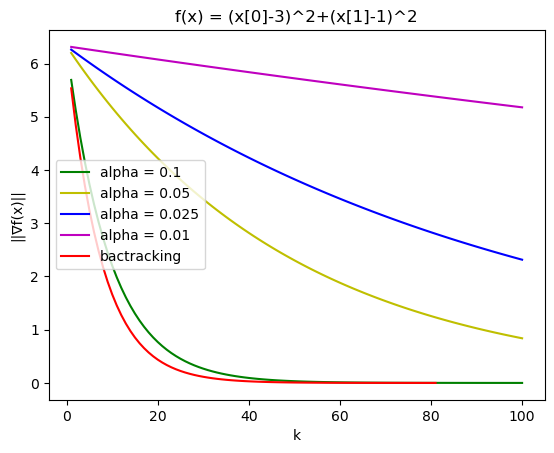

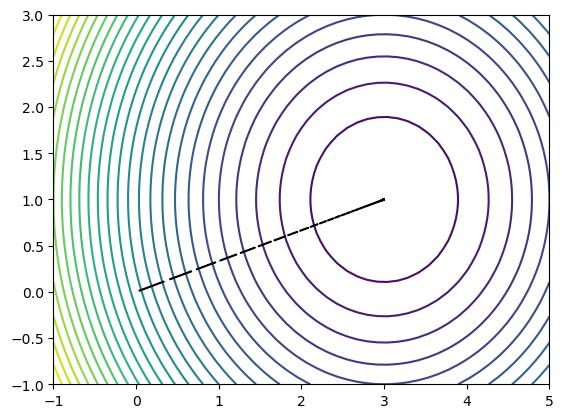

In [4]:
#Function 1
f = lambda x: (x[0]-3)**2+(x[1]-1)**2
g = lambda x: np.array([2*(x[0]-3), 2*(x[1]-1)])
x0=np.zeros(2)
perform_evaluation_and_visualization(f, g, x0, "f(x) = (x[0]-3)^2+(x[1]-1)^2", "k", "||∇f(x)||")

x = np.linspace(-1, 5, 50)
y = np.linspace(-1, 3, 50)
X, Y = np.meshgrid(x, y)

Z = (X - 3)**2 + (Y - 1)**2

contour = plt.contour(X, Y, Z, levels=30, cmap='viridis')
x, k, f_val, grad_norm = gradientDescentWithBacktracking(f, g, x0, 100, 1e-5, 1e-5)
for i in range(k):
  start = x[i]
  end = x[i+1]
  plt.annotate('', xy=end, xytext=start, arrowprops=dict(
    facecolor='blue', shrink=0.1, width=0.5, headwidth=0.7, headlength=0.5))

plt.show()

This first function is a convex function that has a unique minimum at (3,1). The gradiet descent method with fixed step size converges to the minimum for adequate values of $\alpha$, while with too large values the method could diverge or oscillate. The gradient descent with backtracking guarantees stability and always converges to the minimum. Considerations: For small $\alpha$, the convergence is slow. With large values on the other end, there is a risk of instability. Backtracking reduces the risk of choosing a wrong $\alpha$ and guarantees an adaptive step, showing a more uniform convergence.

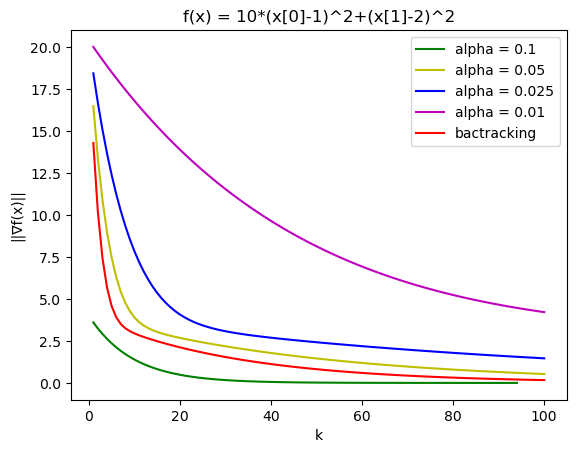

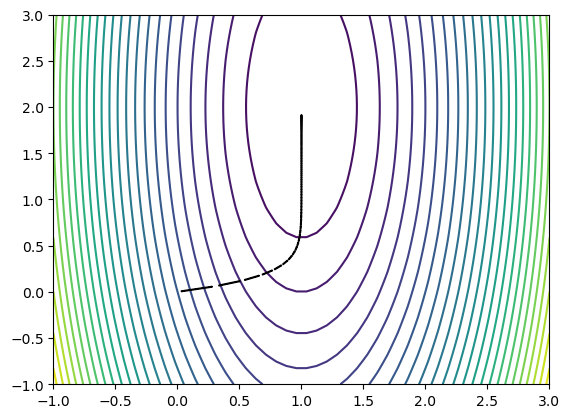

In [5]:
#Function 2
f = lambda x: 10*(x[0]-1)**2+(x[1]-2)**2
g = lambda x: np.array([20 * (x[0] - 1), 2 * (x[1] - 2)])
x0=np.zeros(2)
perform_evaluation_and_visualization(f, g, x0, "f(x) = 10*(x[0]-1)^2+(x[1]-2)^2", "k", "||∇f(x)||")

#contour plot
x = np.linspace(-1, 3, 50)
y = np.linspace(-1, 3, 50)
X, Y = np.meshgrid(x, y)

Z = 10*(X - 1)**2 + (Y - 2)**2

contour = plt.contour(X, Y, Z, levels=30, cmap='viridis')
x, k, f_val, grad_norm = gradientDescentWithBacktracking(f, g, x0, 100, 1e-5, 1e-5)
for i in range(k):

  start = x[i]
  end = x[i+1]
  plt.annotate('', xy=end, xytext=start, arrowprops=dict(
    facecolor='blue', shrink=0.1, width=0.5, headwidth=0.7, headlength=0.5))


plt.show()


In this case, the function is more "distorted" than the previous one (due to the difference in the coefficients 10 and 1), indicating a worse conditioning. The convergence is slower along the flatter direction (axis $x_2$). With fixed step size, small values of $\alpha$ improve stability but slow down convergence. With backtracking, the method automatically adapts to the function's geometry. The distortion in the levels of this function requires a careful choice of $\alpha$ for the fixed step. Backtracking helps to avoid the need for manual tuning. The contour plots clearly show the trajectory of the iterations: the gradient descent follows the steepest gradient and slowly aligns with the direction of the minimum.

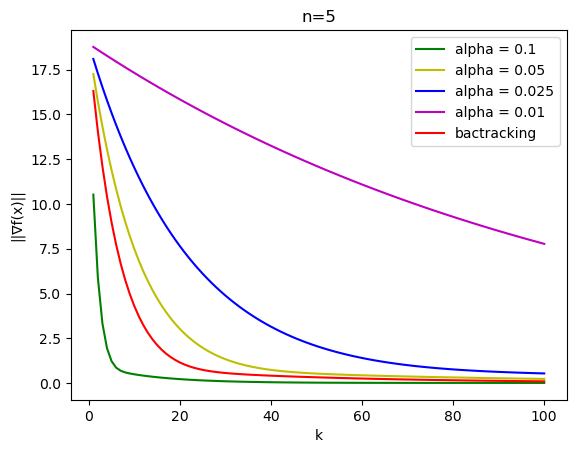

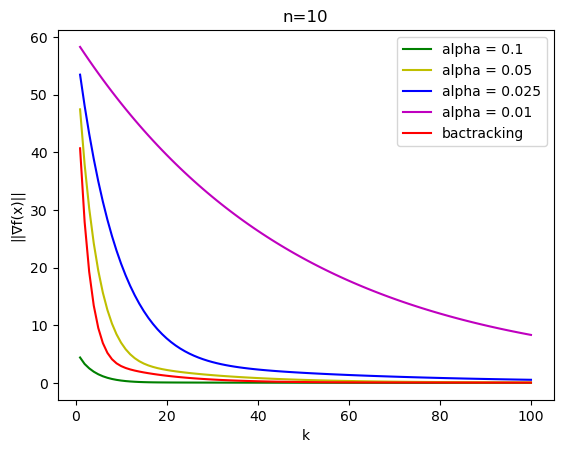

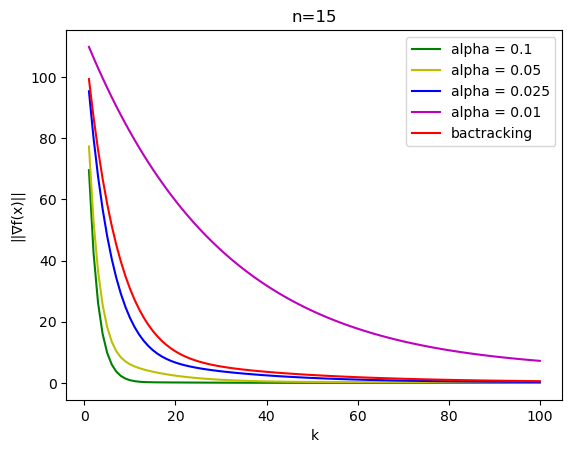

In [6]:
#Function 3
for n in [5, 10, 15]:
  v=np.linspace(0, 1, n)
  A=np.vander(np.linspace(0, 1, n), n, increasing=True)
  x=np.ones(n)
  b=A @ x
  f=lambda x: 0.5 * np.linalg.norm(A @ x - b)**2
  g=lambda x: A.T @ (A @ x - b)
  x0=np.zeros(n)
  perform_evaluation_and_visualization(f, g, x0, f"n={n}", "k", "||∇f(x)||")


These plots highlight the impact of the dimension $n$ and the choice of $\alpha$ on the convergence. For smaller values of $n$, larger steps like $\alpha = 0.1$ guarantee fast convergence but can become unstable with higher $n$, where the conditioning worsens. Conversely, smaller steps ($\alpha = 0.025$ and $\alpha = 0.01$) lead to slower but stable convergence, especially for larger matrices. The backtracking method (red line) stands out for its robustness: the dynamic selection of $\alpha$ guarantees a smooth descent and effectively addresses ill-conditioned problems, proving particularly useful for large $n$. However, the computational cost per iteration is higher than the method without backtracking. In general, the gradient $\nabla f(x_k)$ tends to zero, confirming the convergence of the algorithm. For small $n$, larger steps are advantageous to reduce the number of iterations, while for large $n$ or ill-conditioned problems, backtracking or intermediate steps like $\alpha = 0.05$ represent a good compromise between speed and stability.

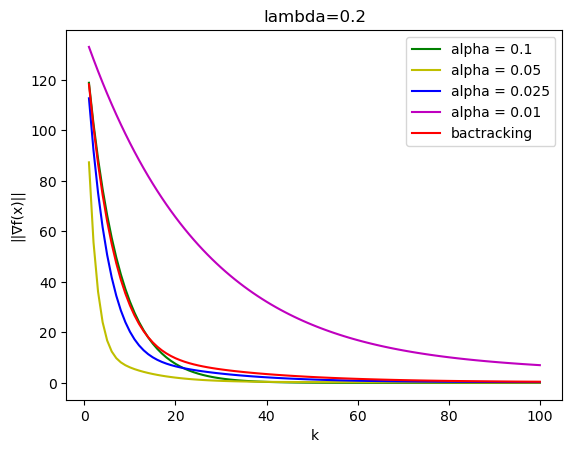

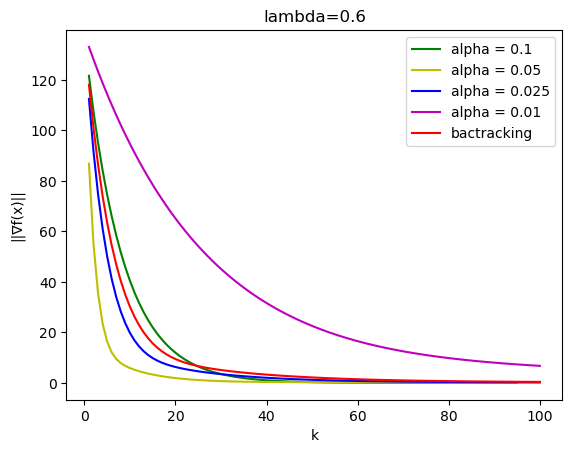

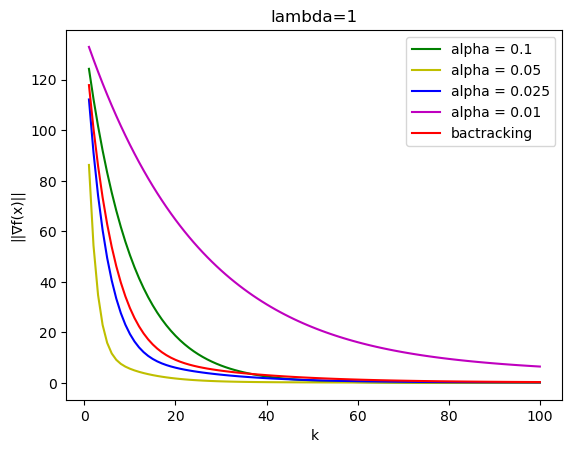

In [7]:
#Fnction 4
for lambda_value in [0.2, 0.6, 1]:
  n=17
  v=np.linspace(0, 1, n)
  A=np.vander(np.linspace(0, 1, n), n, increasing=True)
  x=np.ones(n)
  b=A @ x
  f = lambda x: 0.5 * np.linalg.norm(A @ x - b)**2 + 0.5 * lambda_value * np.linalg.norm(x)**2
  g = lambda x: A.T @ (A @ x - b) + lambda_value * x
  x0=np.zeros(n)
  perform_evaluation_and_visualization(f, g, x0, f"lambda={lambda_value}", "k", "||∇f(x)||")

Increasing $\lambda$ has a regularizing effect on the problem. For higher values of $\lambda$, the matrix becomes better conditioned (more rounded), making the convergence faster. Values of $\lambda$ that are too low can cause slower convergence, similar to the case without regularization. Considerations: Regularization $\lambda$ improves the conditioning of the quadratic problem, facilitating convergence. From the graphs, it is observed how the normalized gradient decreases more rapidly for higher values of $\lambda$, confirming the improvement in conditioning.

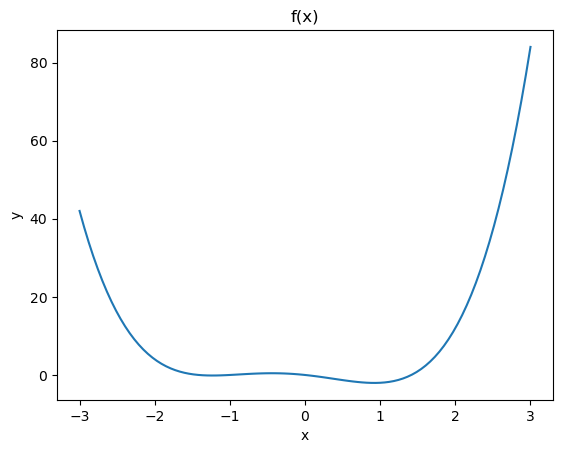

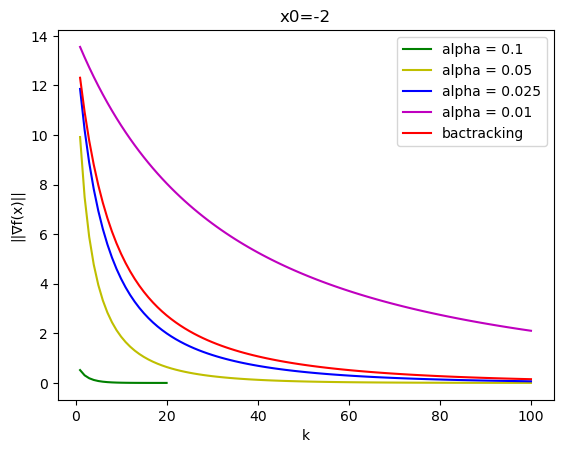

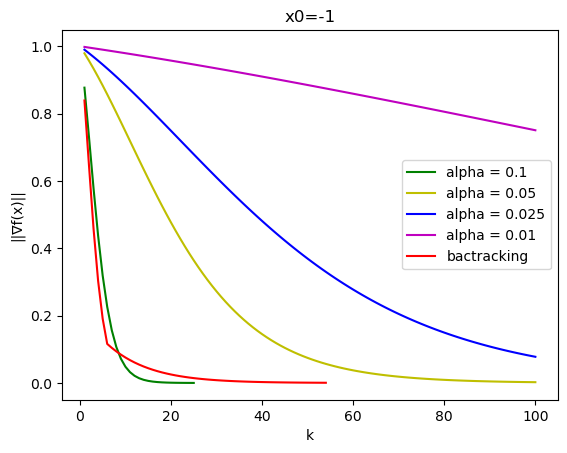

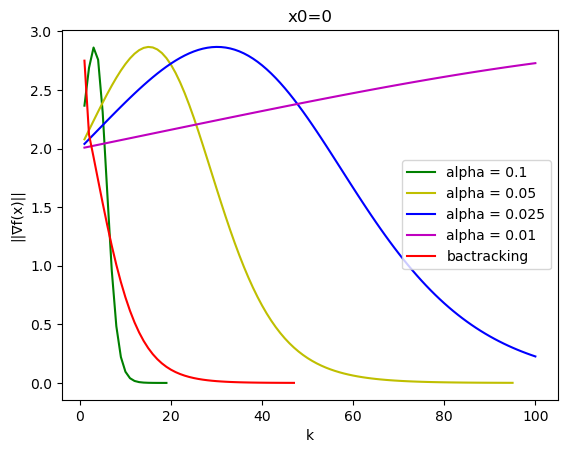

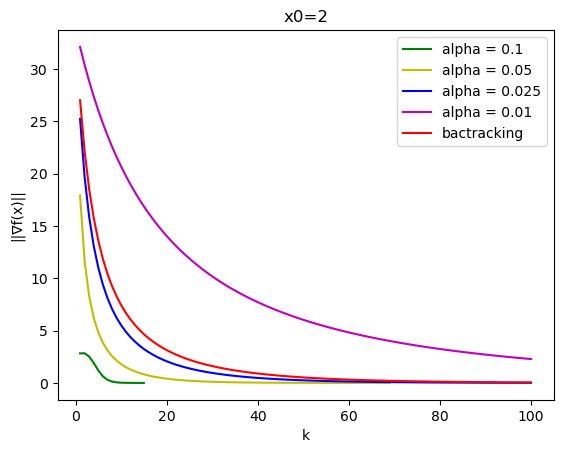

In [8]:
#5
f = lambda x: x**4+x**3-2*x**2-2*x
g = lambda x: 4*x**3+3*x**2-4*x-2
f_x = np.linspace(-3,3,100)
f_y=f(f_x)
plt.plot(f_x,f_y)
plt.xlabel("x")
plt.ylabel("y")
plt.title("f(x)")
plt.show()
for x in [-2,-1,0,2]:
  x0=np.atleast_1d(x)
  perform_evaluation_and_visualization(f, g, x0, f"x0={x}", "k", "||∇f(x)||")

This function is non-convex and has multiple local minima and a global minimum, making the problem challenging. For initial values (x0) close to the global minimum, the gradient descent converges correctly. However, starting from other points, it is possible that the method gets stuck in a local minimum. With too large values of α, the convergence is unstable. 

The non-convex function requires attention in the choice of the initial point (x0). The fixed step can lead to captures in local minima, while backtracking helps stabilize the convergence but cannot avoid the intrinsic problem of local minima. From the tests, it seems that small values of α improve stability but do not solve the local minimum problem.

## Optimization via Stochastic Gradient Descent
Consider a dataset $(X,Y)$, where:

$$
X = \begin{bmatrix} x^1 & x^2 & \dots & x^N \end{bmatrix} \in \mathbb{R}^{d \times N}, \qquad Y = \begin{bmatrix} y^1 & y^2 & \dots & y^N \end{bmatrix} \in \mathbb{R}^N,
$$

together with a model $f_\theta(x)$, with vector of parameters $\theta$. **Training** a ML model requires solving:

$$
\theta^* = \arg\min_{\theta} \ell(\theta; X, Y) = \arg\min_{\theta} \sum_{i=1}^N \ell_i(\theta; x^i, y^i). 
$$

Since the optimization problem above is written as a sum of independent terms that only depends on the single datapoints, it satisfies the hypothesis for the application of the Stochastic Gradient Descent (SGD) algorithm, which articulates as follows:

* Given an integer `batch_size`, *randomly* extract a sub-dataset $\mathcal{M}$ such that $|\mathcal{M}| = `batch_size`$ from the original dataset. Note that the random sampling at each iteration has to be done without replacement.


* Compute the gradient of the loss function on the sampled batch $\mathcal{M}$ as:

  $$
  \nabla \ell(\theta; \mathcal{M}) = \frac{1}{| \mathcal{M} |} \sum_{i \in \mathcal{M}} \nabla \ell (\theta; x^i, y^i),
  $$

* Compute one single iteration of the GD algorithm on the direction described by $\nabla \ell(\theta; \mathcal{M})$:

  $$
  \theta_{k+1} = \theta_k - \alpha_k \nabla \ell(\theta_k; \mathcal{M}),
  $$


* Repeat until the full dataset has been extracted. When this happens, we say that we completed an **epoch** of the SGD method. Repeat this procedure for a number of epochs equal to a parameter `n_epochs`, given as input.

In [9]:
def STOCHASTIC_GRADIENT_DESCENT(loss, grad_loss, X, y, theta0, alpha, batch_size, n_epochs):
    N = X.shape[0]
    d = theta0.shape[0]
    idx = np.arange(0, N)

    theta_history = np.zeros((n_epochs, d))
    loss_history = np.zeros((n_epochs, )) 
    grad_norm_history = np.zeros((n_epochs, ))

    theta = theta0
    for epoch in range(n_epochs):
        np.random.shuffle(idx)
        X_shuff = [X[i] for i in idx]
        y_shuff = [y[i] for i in idx]

        grad_loss_vec = []

        for batch_start in range(0, N, batch_size):
            batch_end = min(batch_start + batch_size, N)
            X_batch = X_shuff[batch_start:batch_end]
            y_batch = y_shuff[batch_start:batch_end]
            gradient = grad_loss(X_batch, y_batch, theta)
            grad_loss_vec.append(np.linalg.norm(gradient, 2))

            theta = theta - alpha * gradient

        theta_history[epoch] = theta
        loss_history[epoch] = loss(X, y, theta)
        grad_norm_history[epoch] = np.mean(grad_loss_vec)

    return theta_history, loss_history, grad_norm_history

In [10]:
# Design matrix

def phi(X, K):
  N=len(X)
  Phi = np.zeros((K,N))
  for i in range(K):
    for j in range(N):
      Phi[i,j] = X[j]**i
  return Phi
#Phi.shape = (K, len(X))

In [11]:
def GRADIENT_DESCENT(loss, grad_loss, X, y, theta0, alpha, maxit=100, tolerance=1e-6):
    N = X.shape[0]
    d = theta0.shape[0]
    idx = np.arange(0, N)
    X = [x for x in X]
    y = [yps for yps in y]

    theta_history = []
    loss_history = []
    grad_norm_history = []

    theta = theta0
    for _ in range(1, maxit+1):
        gradient = grad_loss(X, y, theta)
        grad_norm = np.linalg.norm(gradient, 2)

        theta = theta - alpha * gradient

        theta_history.append(theta)
        loss_history.append(loss(X, y, theta))
        grad_norm_history.append(grad_norm)

        if grad_norm < tolerance:
            break

    return theta_history, loss_history, grad_norm_history

Consider the dataset `poly_regression_large.csv`, provided on Virtuale, and let $f_\theta(x)$ be a polynomial regression model, as discussed in https://devangelista2.github.io/statistical-mathematical-methods/regression_classification/regression.html.

* Split the dataset into training and test set as in the Homework 2, with a proportion of 80% training and 20% test. 

In [12]:
data = pd.read_csv("poly_regression_large.csv")
X = data["x"].to_numpy()
Y = data["y"].to_numpy()
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=42, test_size=0.2, shuffle=True)

data_small = pd.read_csv("poly_regression_small.csv")
X_small = data["x"].to_numpy()
Y_small = data["y"].to_numpy()

* Fix a degree $K$ for the polynomial. 

* Train the polynomial regression model on the training set via the Stochastic Gradient Descent algorithm.

* Train the polynomial regression model on the training set via the Gradient Descent algorithm.

In [13]:
def train(X_large, Y_large, X_small, Y_small, K, theta0):

  #1
  theta_1, _, _ = STOCHASTIC_GRADIENT_DESCENT(loss, grad_loss, X_large, Y_large, theta0, 0.01, 5, 50)

  #2
  theta_2, _, _ = GRADIENT_DESCENT(loss, grad_loss, X_large, Y_large, theta0, 0.001, maxit=1000)

  #3
  theta_3, _, _ = GRADIENT_DESCENT(loss, grad_loss, X_small, Y_small, theta0, 0.001, maxit=1000)

  return theta_1, theta_2, theta_3


In [14]:
def compute_errors(thetas, X, Y):
  f = lambda X, K, theta: phi(X, K).T @ theta
  errors = []
  for i, theta in enumerate(thetas):
    sum = 0
    for sample, y_true in zip(X, Y):
      x=[sample]
      sum+=((f(x, K, theta)-y_true)**2)
    err=sum/len(Y_test)
    errors.append(err)
  return errors

* Train the polynomial regression model on the `poly_regression_small.csv` dataset. Use the full dataset for this test, without splitting it into training and test set.

* Compare the performance of the three regression model computed above. In particular, if $(X_{test}, Y_{test})$ is the test set from the `poly_regression_large.csv` dataset, for each of the model, compute:

  $$
  Err = \frac{1}{N_{test}} \sum_{i=1}^{N_{test}} (f_\theta(x^i) - y^i)^2,
  $$

  where $N_{test}$ is the number of elements in the test set, $(x^i, y^i)$ are the input and output elements in the test set. Comment the performance of the three models.

* Repeat the experiment by varying the degree $K$ of the polynomial. Comment the results.

In [15]:
loss = lambda X, Y, theta: (1/2)*np.linalg.norm(phi(X,K).T@theta-Y)**2
grad_loss = lambda X, Y, theta: phi(X,K)@phi(X,K).T@theta-phi(X,K)@Y
names=["SGD-large", "GD-large", "GD-small"]

for K in [2,4,6,8,10]:
  print(f"Polynomial regression model with degree {K-1}")
  theta0=np.zeros(K)
  t1, t2, t3 = train(X_train, Y_train, X_small, Y_small, K, theta0)
  errors = compute_errors([t1[-1], t2[-1], t3[-1]], X_test, Y_test)
  for i in range(len(errors)):
    print(f"Model {names[i]}: {errors[i]}")
  print("------------------------------------")

Polynomial regression model with degree 1
Model SGD-large: [0.03279879]
Model GD-large: [0.03270687]
Model GD-small: [0.03264485]
------------------------------------
Polynomial regression model with degree 3
Model SGD-large: [0.01809104]
Model GD-large: [0.01701714]
Model GD-small: [0.01664062]
------------------------------------
Polynomial regression model with degree 5
Model SGD-large: [0.01127593]
Model GD-large: [0.01036592]
Model GD-small: [0.01008371]
------------------------------------
Polynomial regression model with degree 7
Model SGD-large: [0.00983457]
Model GD-large: [0.0095855]
Model GD-small: [0.00954614]
------------------------------------
Polynomial regression model with degree 9
Model SGD-large: [0.00989166]
Model GD-large: [0.00976255]
Model GD-small: [0.00972549]
------------------------------------


In the comparison of the three optimization methods (SGD-large, GD-large, and GD-small) for polynomial regression with different polynomial degrees, the results highlight that, although all three methods show similar performance, there are some differences. With degree 1, all three methods have very close average errors, with GD-small having the lowest error, followed by SGD-large and GD-large. As the polynomial degree increases, however, a slight advantage for GD-large emerges, which offers slightly lower average errors compared to the other methods, as in the case of degree 3 and 5, where a smaller difference is observed. SGD-large shows greater variability in the error, but remains competitive. In the case of higher degrees (7 and 9), the differences between the methods become even more marginal, but GD-large continues to maintain a slight advantage in terms of accuracy, followed by GD-small and SGD-large. 
In conclusion, GD-large is the most stable and accurate method, although GD-small and SGD-large have similar performance and can be preferred in contexts where speed or memory are limited, as they tend to be less computationally expensive.

* Set $K=5$ (so that the polynomial regression model is a polynomial of degree 4). Compare the parameters learned by the three models with the true parameter $\theta^* = [0, 0, 4, 0, -3]$.

In [16]:
K=5
theta0=np.ones(K)
true_theta=np.array([0, 0, 4, 0, -3])
theta_1, _, _ = STOCHASTIC_GRADIENT_DESCENT(loss, grad_loss, X_train, Y_train, theta0, 0.01, 5, 50)
theta_2, _, _ = GRADIENT_DESCENT(loss, grad_loss, X_train, Y_train, theta0, 0.001)
theta_3, _, _ = GRADIENT_DESCENT(loss, grad_loss, X_small, Y_small, theta0, 0.001)

for i, theta in enumerate([theta_1[-1], theta_2[-1], theta_3[-1]]):
  print(f"Model {i+1}: \n\t{np.linalg.norm(true_theta-theta)} \n\t {theta} ")

Model 1: 
	4.03163145632773 
	 [-0.18447209  1.8161033   0.93031401 -0.23180908 -1.14390638] 
Model 2: 
	4.486755087826485 
	 [-0.0116349   1.27893452  0.57364455 -0.01889097 -0.40098215] 
Model 3: 
	4.415822764657342 
	 [-0.05286429  1.41717215  0.61761405 -0.08016818 -0.54208268] 


In the comparison of the parameters learned by the three models with the true parameter $\theta^* = [0, 0, 4, 0, -3]$, the results show some differences in the parameter estimates, reflecting the characteristics of the respective optimization methods. 

Model 1 (SGD-large):
The error with respect to the true parameter is about 4.03. The learned parameters are very far from the true ones, with values significantly different from the expected ones, such as the coefficient $[0]$ for $x^0$ which is about -0.2, or the term $x^4$ which is about -1.14. This suggests that the stochastic algorithm had difficulty converging exactly to the optimal values, probably due to the variability introduced by the mini-batch process.

Model 2 (GD-large):
The error is about 4.49, the largest among the three. The learned parameters are closer to the real values, but are still far away, especially for the terms associated with the lower powers of $x$. Although the gradient descent algorithm used the entire dataset for each update, the larger error could result from imperfect convergence or an suboptimal set of hyperparameters.

Model 3 (GD-small):
The error of 4.42 is similar to that of Model 2. The learned parameters are closer to the real values than Model 1, with a better estimate for the coefficients $x^1$ and $x^3$. The estimate for $x^4$ is still far away, but this suggests that even the GD-small algorithm struggled to reach the optimal solution, while remaining relatively stable.

In summary, all three models show some difficulties in reaching exactly the values of the true parameters, but GD-small seems to provide the best estimate in terms of proximity to the expected values. Although none of the methods have learned the parameters perfectly, GD-small and GD-large appear more robust than SGD-large in this case, probably due to the greater stability of the optimization process.